## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

data=pd.read_csv('cleaned_ecommerce_dataset.csv')
len(data)
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [24]:
# Displaying the First 10 rows of dataset
data.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
5,4081,100399,Good for sci-fi,Matrix,3.0,3.0,M,Movies,40,24.51,4
6,4081,100399,Scary? you bet!,Blair Witch Project,4.0,3.0,M,Movies,12,44.00,4
7,4081,101899,Fox - the 4th basic channel,FOX,4.0,4.0,M,Media,25,80.00,4
8,4081,112099,Amen!,Dogma,4.0,3.0,M,Movies,22,87.59,4
9,4081,122899,mama mia!,Olive Garden,4.0,3.0,M,Restaurants & Gourmet,49,32.00,4


In [25]:
#Displaying information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [26]:
# Calculate the correlation between 'helpfulness' and 'rating'
correlation1 = data[['helpfulness','rating']].corr()

# Print the correlation coefficient
correlation1

,helpfulness,rating
helpfulness,1.000000,-0.007523
rating,-0.007523,1.000000


The correlation between helpfulness and rating is negative and very weak, almost no linear relationship is being observed

In [27]:
# Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()

# Convert categorical columns to numerical values
categorical_columns = ['gender', 'category', 'review']
encoded_values = encoder.fit_transform(data[categorical_columns])
data_encoded = pd.DataFrame(encoded_values, columns=categorical_columns)
data_numeric = pd.concat([data.drop(categorical_columns, axis=1), data_encoded], axis=1)

data_numeric








,userId,timestamp,item,rating,helpfulness,item_id,item_price,user_city,gender,category,review
0,4081,71900,McDonald's,4.0,3.0,41,30.74,4,1.0,8.0,1618.0
1,4081,72000,Taco Bell,1.0,4.0,74,108.30,4,1.0,8.0,1125.0
2,4081,72000,Wendy's,5.0,4.0,84,69.00,4,1.0,8.0,2185.0
3,4081,100399,"South Park: Bigger, Longer & Uncut",5.0,3.0,68,143.11,4,1.0,5.0,2243.0
4,4081,100399,American Pie,3.0,3.0,6,117.89,4,1.0,5.0,1033.0
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Austin Powers: The Spy Who Shagged Me,5.0,3.0,9,111.00,5,1.0,5.0,968.0
2681,2445,30700,Outback Steakhouse,5.0,3.0,50,25.00,5,1.0,8.0,920.0
2682,2445,61500,Fight Club,5.0,3.0,26,97.53,5,1.0,5.0,968.0
2683,2445,100500,The Sims 2: Open for Business for Windows,5.0,4.0,79,27.00,5,1.0,1.0,372.0


In [28]:
#Correlation for Review and Rating
correlation2 =data_numeric[['review','rating']].corr()
correlation2

,review,rating
review,1.000000,-0.036118
rating,-0.036118,1.000000


The correlation between helpfulness and rating is negative and very weak, almost no linear relationship is being observed

In [29]:
correlation3 =data_numeric[['gender','rating']].corr()
correlation3

,gender,rating
gender,1.000000,-0.034337
rating,-0.034337,1.000000


The correlation between helpfulness and rating is negative and very weak, almost no linear relationship is being observed

In [30]:
correlation4 =data_numeric[['category','rating']].corr()
correlation4

,category,rating
category,1.000000,-0.163158
rating,-0.163158,1.000000


Moderate linear relationshiop is being displayed



### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [31]:

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_numeric, test_size=0.9,random_state=142) #10% for test
print('Shape of Case 1:', X_train.shape, X_test.shape)
y_train, y_test = train_test_split(data_numeric, test_size=0.1,random_state=142,) #90% for test
print('Shape Of Case 2:', y_train.shape, y_test.shape)

Shape of Case 1: (268, 11) (2417, 11)
Shape Of Case 2: (2416, 11) (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [32]:
#Model A

regA=linear_model.LinearRegression()
XmodA=X_train[['category', 'review']]
ymodA=X_train['rating']
regA.fit(XmodA,ymodA)


LinearRegression()

In [33]:
#Model B
regB=linear_model.LinearRegression()
Xmodb=X_train[['gender','helpfulness']]
ymodb=X_train['rating']
regB.fit(Xmodb,ymodb)

LinearRegression()

In [34]:
#Model C
regC=linear_model.LinearRegression()
Xmodc=y_train[['category','review']]
ymodc=y_train['rating']
regC.fit(Xmodc,ymodc)

LinearRegression()

In [35]:
#Model D
regD=linear_model.LinearRegression()
Xmodd=y_train[['gender','helpfulness']]
ymodd=y_train['rating']
regD.fit(Xmodd,ymodd)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [36]:
#Evaluation For Model A
X_test1=X_test[['category','review']]
y_test1=X_test['rating']

predicted=regA.predict(X_test1)
mse1=((np.array(y_test1) - predicted)**2).sum()/len(y_test1)
root_mse1=np.sqrt(mse1)
print("MSE:",mse1)
print("Root MSE:",root_mse1)

MSE: 1.7690740179517055
Root MSE: 1.3300654186737229


In [37]:
#Evaluation For Model B
X_test2=X_test[['gender','helpfulness']]
y_test2=X_test['rating']

predicted=regB.predict(X_test2)
mse2=((np.array(y_test2) - predicted)**2).sum()/len(y_test2)
root_mse2=np.sqrt(mse2)
print("MSE:",mse2)
print("Root MSE:", root_mse2)

MSE: 1.8412549895856636
Root MSE: 1.356928513071217


In [38]:
#Evaluation For Model c
X_test3=y_test[['category','review']]
y_test3=y_test['rating']

predicted=regC.predict(X_test3)
mse3=((np.array(y_test3) - predicted)**2).sum()/len(y_test3)
root_mse3=np.sqrt(mse3)
print("MSE:",mse3)
print("Root MSE:",np.sqrt(mse3))

MSE: 1.7588975359805044
Root MSE: 1.3262343442923292


In [39]:
#Evaluation For Model D
X_test4=y_test[['gender','helpfulness']]
y_test4=y_test['rating']

predicted=regD.predict(X_test4)
mse4=((np.array(y_test4) - predicted)**2).sum()/len(y_test4)
root_mse4=np.sqrt(mse4)
print("MSE:",mse4)
print("Root MSE:",root_mse4)

MSE: 1.8109460127732366
Root MSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [40]:
mse=[mse1,mse2,mse3,mse4]
mse_root=[root_mse1,root_mse2,root_mse3,root_mse4]
data_mse = pd.DataFrame({'mse': mse, 'rmse': mse_root, 'Model': ["A", "B", "C", "D"]})
data_mse

,mse,rmse,Model
0,1.769074,1.330065,A
1,1.841255,1.356929,B
2,1.758898,1.326234,C
3,1.810946,1.345714,D


## MSE (lowest accurate to most accurate)
- Model B has an MSE of 1.841255 used 90% of the testing data and is the most correlated, hence why it has the highest mse
- Model D has an MSE of 1.810946 used 10% of the testing data and is the most correlated hence why it has the highest mse 
- Model A has an MSE of 1.769074 used 90% of the testing data and is the least correlated hence why it has the lowest mse
- Model C has an MSE of 1.758898 used 10% of the testing data and is the least correlated hence why it has the lowest mse

## Model A and B
- Both Models were trained using the same data but however they had different correlations hence why correlations can have a massive impact on the mse. As the Graph shows Model A(Blue) and Model B(orange), model B has the highest MSE.
## Model C  and D
- Both Models were trained using the same data but however they had different correlations hence why correlations can have a massive impact on the mse. As the Graph shows Model C(green) and Model D(red), model D has the highest MSE.
## Model C and A
- Both Models were trained using same correlations but however they had different testing data sizes resulting in one have a higher mse then the other. As the Graph shows Model C(green) and Model A(blue), model A has the highest MSE.
## Model B and D
- Both Models were trained using same correlations but however they had different testing data sizes resulting in one have a higher mse then the other. As the Graph shows Model B(orange) and Model D(red), model B has the highest MSE.

## Overall
- As shown by the graphs of MSE scores, the corelation does matter but the freatue of the graphs that matter the most is size of training data which have slightly affected the mse scores.

## This can Also be seen with the root mse

<Axes: xlabel='mse', ylabel='Model'>

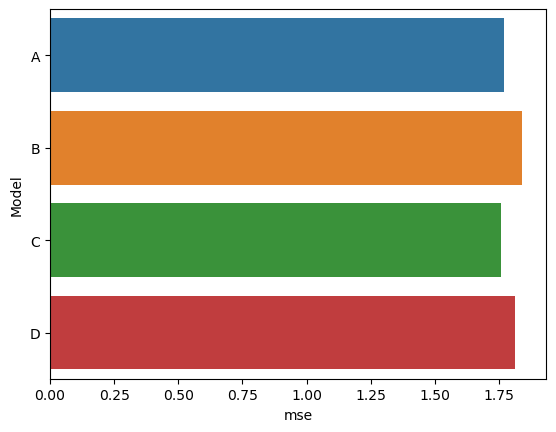

In [41]:
sns.barplot(data=data_mse, y='Model', x='mse')



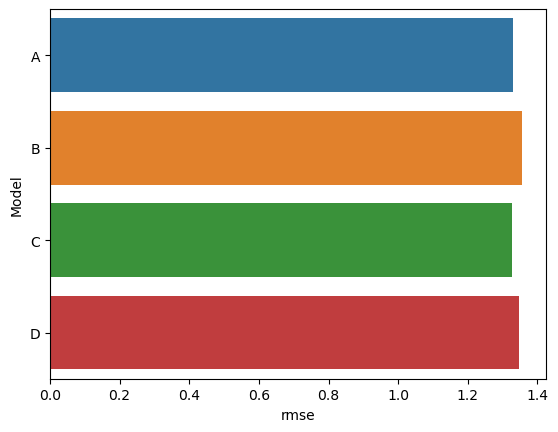

In [42]:
plot=sns.barplot(data=data_mse, y='Model', x='rmse')